In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd
import graphviz

In [86]:
# path = "test_files//20180313-il//tree//min_max_(0,1)//"
path = "test_files//boston//"
trainY=pd.read_csv(path+"trainY.csv",index_col=0)
trainYhat=pd.read_csv("tmp//trainYHat.csv",index_col=0)
testY=pd.read_csv(path+"testY.csv",index_col=0)
testYhat=pd.read_csv("tmp//testYHat.csv",index_col=0)
file="tmp//dif.csv"
df=pd.read_csv(file,index_col=0) 
# df=df.drop("dot",axis=1)

In [87]:
fitness_by_generation_min = df.groupby(by="generation").train_error.min()
fitness_by_generation_testmin = df.groupby(by="generation").test_error.min()

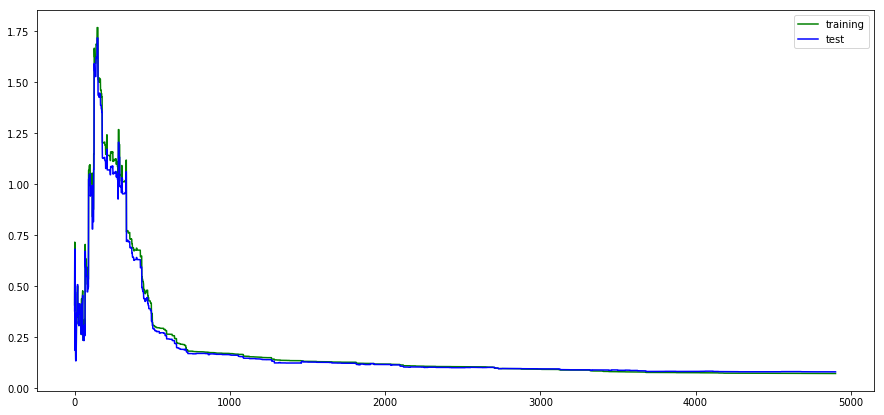

In [88]:
plt.figure(figsize=(15,7))
# plt.gca().set_ylim([0,10000])
plt.plot(fitness_by_generation_min,"g",label="training")
plt.plot(fitness_by_generation_testmin,"b",label="test")
plt.legend()
plt.show()

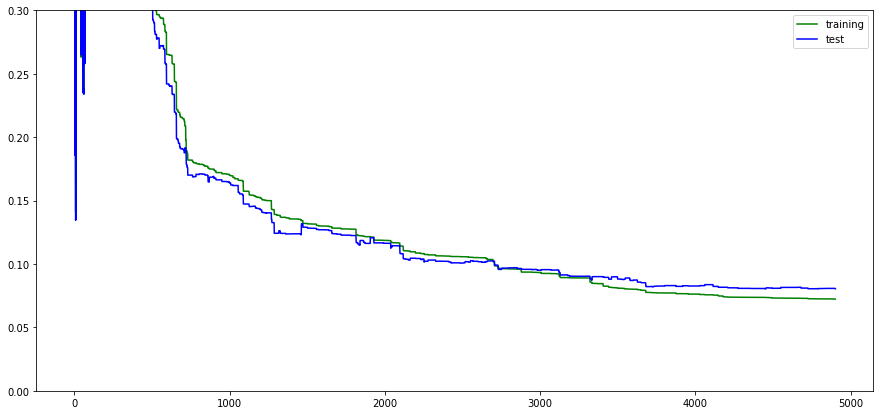

In [89]:
# plt.gca().set_ylim([0,0.1])
plt.figure(figsize=(15,7))
plt.gca().set_ylim([0,0.3])
plt.plot(fitness_by_generation_min,"g",label="training")
plt.plot(fitness_by_generation_testmin,"b",label="test")
plt.legend()
plt.show()

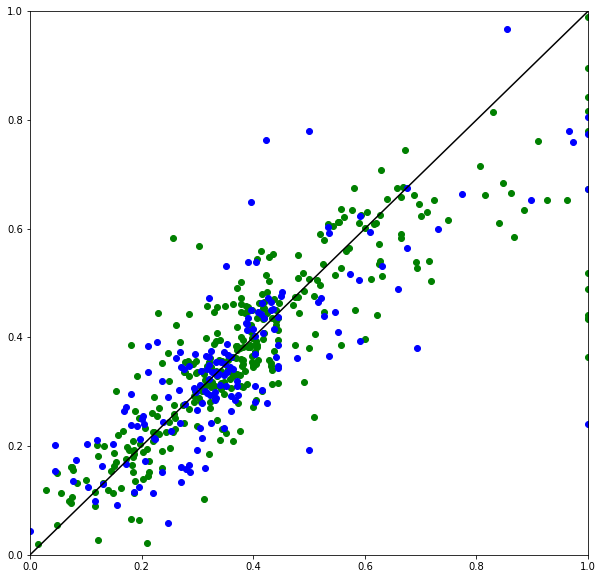

In [90]:
plt.figure(figsize=(10,10))
# plt.axis([-1, 1.0, -1, 1.0])
plt.axis([0, 1.0, 0, 1.0])
plt.plot([-10,10],[-10,10],"black")
# plt.plot([-10.3,10],[-10,10],'--', color = 'gray')
# plt.plot([-9.7,10],[-10,10],'--', color = 'gray')
# plt.plot([-10,10],[-10,10],"r")
plt.scatter(trainY.values,trainYhat.values,color="green")
plt.scatter(testY.values,testYhat.values,color="blue")
plt.savefig("tmp//residuals.pdf")

In [64]:
trainY.shape

(339, 1)

In [41]:
trainYhat.shape

(339, 1)

In [ ]:
def best_of_generation(gen=df.generation.max()):
    return df[df.generation == gen].sort_values(by="train_error").iloc[0]
def plot_dot(gen=df.generation.max()):
    return graphviz.Source(best_of_generation(gen)["dot"])

In [ ]:
plot_dot()

In [246]:
a=(best_of_generation()["dot"])
f = open('tmp//topology.txt','w')
f.write(a)
f.close()

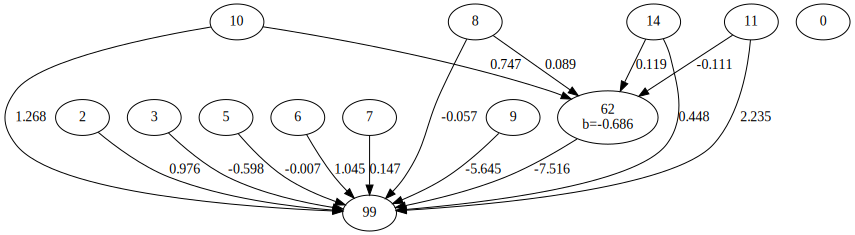

In [248]:
plot_dot()

In [133]:
plot_dot().render("tmp//topology")

'tmp//topology.pdf'

In [ ]:
pd.read_csv()